<a href="https://colab.research.google.com/github/cdivy/git_test/blob/main/Titanic_Survival_prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Exploring Data

In [2]:
train_df = pd.read_csv('/content/train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Definitions
Survival: 0 = No, 1 = Yes

Pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Sex

Age: Age in years

SibSp: number of siblings/spouses aboard the Titanic

Parch: number of parents/children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.shape

(891, 12)

## Check for missing data

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

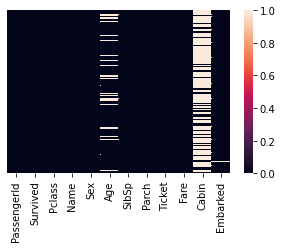

In [8]:
plt.rcParams['figure.figsize'] = [5,3]
sns.heatmap(train_df.isnull(), yticklabels=False)



*    Missing values are there in columns 'Age' & 'Cabin' and 'Embarked'




In [9]:
train_df.Age.mean()

29.69911764705882



*   Missing values in Age column is almost one fifth of total numer of rows which can be filled with average age.




In [10]:
train_df.Age.fillna( train_df.Age.mean(), inplace=True)

In [11]:
train_df['Age'].isna().sum()

0

In [12]:
train_df['Cabin'].isna().sum()

687



*   Almost 77% of values are missing in column "Cabin" so we can drop this column



In [13]:
train_df = train_df.drop(columns=['Cabin'],axis=1)

In [14]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
train_df.Embarked.isna().sum()

2

In [16]:
train_df = train_df.dropna(axis=0)

In [17]:
train_df.Embarked.isna().sum()

0

In [18]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#Check if any duplicate rows in dataset
train_df.duplicated().sum()

0

## Feature Selection

In [20]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [22]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Visualizing data and finding relationships

In [24]:
sns.set_style("whitegrid")

In [25]:
X1 = 'Survived'
hue1 = ['Sex','Pclass','Embarked','None']

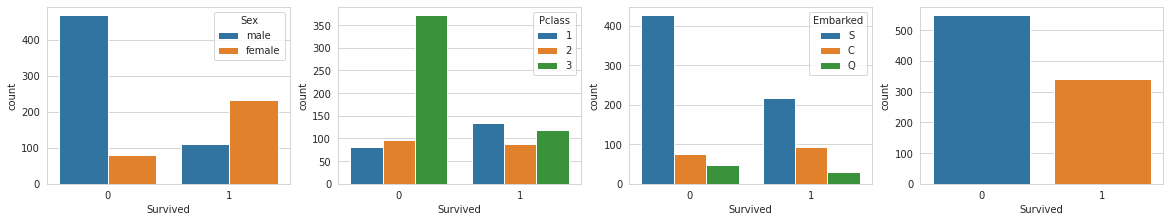

In [26]:
for i in range(len(hue1)):
  plt.rcParams['figure.figsize'] = [20,15]
  plt.subplot(4,4,(i+1))
  if i != 3:
    sns.countplot(x=X1 ,hue = hue1[i],data=train_df, )
  else:
    sns.countplot(x=X1 ,data=train_df, )




*   Out of all survived , females survived are more in number

*   Out of the people who survived , people from passenger class 1st and 3rd survived more than the people who were from 2nd class and most died were from 3rd Passenger class
*   Out of all people survived , maximum number of people embarked the ship from "S"

*  Out of all persons on the ship, number of people survived are less than the number of people died









/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

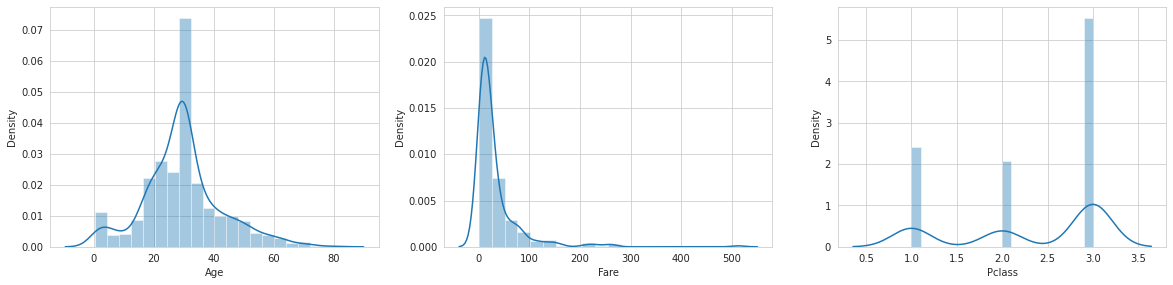

In [27]:
# Plots to see the distribution of the continuous features individually
num_cols = [train_df['Age'], train_df['Fare'],train_df['Pclass']]
for i in range(len(num_cols)):
  plt.rcParams['figure.figsize'] = [20,15]
  plt.subplot(3,3,(i+1))
  sns.distplot(num_cols[i] ,bins=20 )
  
  

## Feature Encoding

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
#Converting categorical data
cat_colms = [[train_df['Sex']],[train_df['Pclass']],[train_df['Embarked']]]
def one_hot_encode(cat_colms,prefix):
  for item in cat_colms:
    return pd.get_dummies(item,prefix=prefix)
df_embarked_one_hot = one_hot_encode(cat_colms[2],prefix='embarked')
df_Pclass_one_hot = one_hot_encode(cat_colms[1],prefix='Pclass')
df_Sex_one_hot = one_hot_encode(cat_colms[0],prefix='Sex')

In [30]:
train_df_one_hot = pd.concat([train_df, 
                        df_embarked_one_hot, 
                        df_Sex_one_hot, 
                        df_Pclass_one_hot], axis=1)

In [31]:
train_df = train_df_one_hot.drop(columns=['Embarked','Sex','Pclass'])

In [32]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [33]:
train_df.shape

(889, 13)

## Building Machine Learning Models

In [34]:
#Splitting into train and test data
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split( X,y,random_state=1)

In [36]:
X_train.shape, y_train.shape

((666, 12), (666,))

## Training Models

## Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_valid)
gbc_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for Gradient boosting Classifier : ",gbc_acc)

Accuracy for Gradient boosting Classifier :  0.8340807174887892


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state = 1)
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_valid)
lgr_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for Logistic Regression : ",lgr_acc)

Accuracy for Logistic Regression :  0.8385650224215246


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_valid)
gnb_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for Logistic Regression : ",gnb_acc)

Accuracy for Logistic Regression :  0.7982062780269058


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_valid)
dtc_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for Decision Tree Classifier : ",dtc_acc)

Accuracy for Decision Tree Classifier :  0.7937219730941704


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_valid)
rfc_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for Random Forest Classifier : ",rfc_acc)

Accuracy for Random Forest Classifier :  0.820627802690583


# Support Vector Machine

In [42]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_valid)
svc_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for Support Vector Classifier : ",svc_acc)

Accuracy for Support Vector Classifier :  0.6502242152466368


## K Nearest Neighbour

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred = knc.predict(X_valid)
knc_acc = accuracy_score(y_pred, y_valid)
print("Accuracy for K Neighbors Classifier : ",knc_acc)

Accuracy for K Neighbors Classifier :  0.7085201793721974


## Making a dataframe for comparing all Machine Learning Models

In [44]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
               'SVC', 'Random Forest',
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [
        knc_acc, 
        lgr_acc,  
        gnb_acc, 
        svc_acc,
        rfc_acc,
        dtc_acc,
        gbc_acc,
    ]})
print("--- Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

--- Accuracy Scores---


,Model,Score
1,Logistic Regression,0.838565
6,Gradient Boosting Classifier,0.834081
4,Random Forest,0.820628
2,Naive Bayes,0.798206
5,Decision Tree,0.793722
0,KNN,0.708520
3,SVC,0.650224


We gained maximum accuracy score from "Logistic Regression" and "Gradient Boosting Classifier",so we will choose them for our final test data.

Test file

In [123]:
test_df1 = pd.read_csv('/content/train.csv')
test_df =test_df1
test_df.shape

(891, 12)

Finding Missing values and removing them 

In [124]:
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
test_df.Age.fillna(test_df.Age.mean(),inplace=True)

In [126]:
test_df = test_df.drop('Cabin',axis=1)
test_df = test_df.drop('Ticket',axis=1)

In [127]:
test_df.dropna(axis=0, inplace=True)

In [128]:
test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [129]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Feature selection in test data

In [130]:
test_df = test_df[[ 'PassengerId','Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked','Survived']]
test_df.head()
test_df.shape

(889, 9)

Feature encoding for test data

In [131]:
#Converting categorical data
cat_colms = [[test_df['Sex']],[test_df['Pclass']],[test_df['Embarked']]]
def one_hot_encode(cat_colms,prefix):
  for item in cat_colms:
    return pd.get_dummies(item,prefix=prefix)
df_embarked_one_hot = one_hot_encode(cat_colms[2],prefix='embarked')
df_Pclass_one_hot = one_hot_encode(cat_colms[1],prefix='Pclass')
df_Sex_one_hot = one_hot_encode(cat_colms[0],prefix='Sex')

test_df_one_hot = pd.concat([test_df, 
                        df_embarked_one_hot, 
                        df_Sex_one_hot, 
                        df_Pclass_one_hot], axis=1)

test_df = test_df_one_hot.drop(columns=['Embarked','Sex','Pclass'])


In [132]:
test_df.shape

(889, 14)

In [133]:
test_df.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived',
       'embarked_C', 'embarked_Q', 'embarked_S', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [140]:
X_train = test_df.drop("Survived", axis=1)
y_train = test_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1)
X_train.shape, y_train.shape, X_test.shape

((889, 13), (889,), (889, 13))

In [141]:
gbc.fit(X_train, y_train)
Y_pred_test = gbc.predict(X_test)

In [142]:
acc = round(gbc.score(X_train, y_train) * 100, 2)
print("Accuracy Score for Gradient Boosting Classifier on test data: ",acc)

Accuracy Score for Gradient Boosting Classifier on test data:  89.2


In [143]:
#Check for final test result columns
Y_pred_test.shape

(889,)

Submission

In [154]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = Y_pred_test # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1


In [155]:
N = 471
submission.drop(index=submission.index[-N:], 
        axis=0, 
        inplace=True)
submission.shape

(418, 2)

In [156]:
submission.to_csv(r'C:\Users\juhi\Desktop\Kaggle\submission.csv',index=False)

In [157]:
check = pd.read_csv(r'C:\Users\juhi\Desktop\Kaggle\submission.csv')
check.head()

,PassengerId,Survived
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
